# Hospital example

## Run error detection and repair 30 times

We use ground truth to label 20 tuples in each run.

In [1]:
import numpy as np
import pandas
from IPython.core.display import display

import raha

In [2]:
datasets = []

for i in range(30):
    from raha import analysis_utilities
    app_1 = raha.Detection()
    app_2 = raha.Correction()

    # How many tuples would you label?
    app_1.LABELING_BUDGET = 20
    app_2.LABELING_BUDGET = 0

    # Would you like to see the logs?
    app_1.VERBOSE = False
    app_2.VERBOSE = False

    dataset_dictionary = {
        "name": "hospital",
        "path": "datasets/hospital/dirty.csv",
        "clean_path": "datasets/hospital/clean.csv"
    }
    d = app_1.initialize_dataset(dataset_dictionary)

    app_1.run_strategies(d)
    app_1.generate_features(d)
    app_1.build_clusters(d)

    while len(d.labeled_tuples) < app_1.LABELING_BUDGET:
        app_1.sample_tuple(d)
        if d.has_ground_truth:
            app_1.label_with_ground_truth(d)

    app_1.propagate_labels(d)
    app_1.predict_labels(d)

    app_2.initialize_models(d)
    app_2.initialize_dataset(d)
    for si in d.labeled_tuples:
        d.sampled_tuple = si
        app_2.update_models(d)
        app_2.generate_features(d)
        app_2.predict_corrections(d)

    print(f"Run {i} done")

    datasets.append(d)

I just load strategies' results as they have already been run on the dataset!


Run 0 done


I just load strategies' results as they have already been run on the dataset!


Run 1 done


I just load strategies' results as they have already been run on the dataset!


Run 2 done


I just load strategies' results as they have already been run on the dataset!


Run 3 done


I just load strategies' results as they have already been run on the dataset!


Run 4 done


I just load strategies' results as they have already been run on the dataset!


Run 5 done


I just load strategies' results as they have already been run on the dataset!


Run 6 done


I just load strategies' results as they have already been run on the dataset!


Run 7 done


I just load strategies' results as they have already been run on the dataset!


Run 8 done


I just load strategies' results as they have already been run on the dataset!


Run 9 done


I just load strategies' results as they have already been run on the dataset!


Run 10 done


I just load strategies' results as they have already been run on the dataset!


Run 11 done


I just load strategies' results as they have already been run on the dataset!


Run 12 done


I just load strategies' results as they have already been run on the dataset!


Run 13 done


I just load strategies' results as they have already been run on the dataset!


Run 14 done


I just load strategies' results as they have already been run on the dataset!


Run 15 done


I just load strategies' results as they have already been run on the dataset!


Run 16 done


I just load strategies' results as they have already been run on the dataset!


Run 17 done


I just load strategies' results as they have already been run on the dataset!


Run 18 done


I just load strategies' results as they have already been run on the dataset!


Run 19 done


I just load strategies' results as they have already been run on the dataset!


Run 20 done


I just load strategies' results as they have already been run on the dataset!


Run 21 done


I just load strategies' results as they have already been run on the dataset!


Run 22 done


I just load strategies' results as they have already been run on the dataset!


Run 23 done


I just load strategies' results as they have already been run on the dataset!


Run 24 done


I just load strategies' results as they have already been run on the dataset!


Run 25 done


I just load strategies' results as they have already been run on the dataset!


Run 26 done


I just load strategies' results as they have already been run on the dataset!


Run 27 done


I just load strategies' results as they have already been run on the dataset!


Run 28 done


I just load strategies' results as they have already been run on the dataset!


Run 29 done


## Evaluation

In [3]:
evaluation_df = pandas.DataFrame(columns=["Task", "Precision", "Recall", "F1 Score"])

for d in datasets:
    edp, edr, edf = d.get_data_cleaning_evaluation(d.detected_cells)[:3]
    ecp, ecr, ecf = d.get_data_cleaning_evaluation(d.corrected_cells)[-3:]

    evaluation_df = evaluation_df.append({"Task": "Error Detection (Raha)", "Precision": edp,
                                          "Recall": edr, "F1 Score": edf}, ignore_index=True)
    evaluation_df = evaluation_df.append({"Task": "Error Correction (Baran)", "Precision": ecp,
                                          "Recall": ecr, "F1 Score": ecf}, ignore_index=True)
display(evaluation_df)

evaluation_df.groupby("Task").agg(["mean", "std", "min", "max"])

/home/adrian/source/MA/raha/raha/dataset.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if correction_dictionary[cell] == actual_errors[cell]:


,Task,Precision,Recall,F1 Score
0,Error Detection (Raha),0.989619,0.561886,0.716792
1,Error Correction (Baran),0.705036,0.385069,0.498094
2,Error Detection (Raha),0.962264,0.601179,0.740024
3,Error Correction (Baran),0.706271,0.420432,0.527094
4,Error Detection (Raha),0.932584,0.652259,0.767630
5,Error Correction (Baran),0.772595,0.520629,0.622066
6,Error Detection (Raha),1.000000,0.457760,0.628032
7,Error Correction (Baran),0.798283,0.365422,0.501348
8,Error Detection (Raha),0.936170,0.432220,0.591398
9,Error Correction (Baran),0.706140,0.316306,0.436906


Precision                                  Recall  \
                              mean       std       min       max      mean   
Task                                                                         
Error Correction (Baran)  0.782811  0.076626  0.530457  0.944649  0.469024   
Error Detection (Raha)    0.945553  0.057776  0.703163  1.000000  0.588147   

                                                        F1 Score            \
                               std       min       max      mean       std   
Task                                                                         
Error Correction (Baran)  0.077293  0.316306  0.648330  0.583817  0.074119   
Error Detection (Raha)    0.079840  0.432220  0.752456  0.721548  0.064779   

                                              
                               min       max  
Task                                          
Error Correction (Baran)  0.436906  0.762125  
Error Detection (Raha)    0.591398  0.853958

## Analyze the alternative repairs

In [4]:
alternative_count_list = []

for d in datasets:
    number_of_repairs = len(d.correction_collection)
    number_of_repairs_hist = dict()

    for cell_repairs in d.correction_collection.values():
        num = len(cell_repairs)
        number_of_repairs_hist[num] = number_of_repairs_hist.get(num, 0) + 1

    hist = [0] * (max(number_of_repairs_hist.keys()) + 1)
    for num, count in number_of_repairs_hist.items():
        hist[num] = count

    alternative_count_list.append(number_of_repairs_hist)

    #print(f"Histogram of the number of alternative repairs: {list(enumerate(hist))}")

max_alternatives = max(max(h.keys()) for h in alternative_count_list)

alternative_count_df = pandas.DataFrame(columns=list(range(max_alternatives + 1)))

for hist in alternative_count_list:
    alternative_count_df = alternative_count_df.append(hist, ignore_index=True)

alternative_count_df.drop(0,axis=1,inplace=True)
alternative_count_df = alternative_count_df.fillna(0)
alternative_count_df

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0,157.0,68.0,12.0,2.0,2.0,3.0,5.0,3.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,193.0,68.0,10.0,0.0,1.0,0.0,5.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,214.0,80.0,9.0,2.0,1.0,0.0,3.0,2.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,150.0,45.0,17.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,116.0,64.0,10.0,17.0,6.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,168.0,72.0,14.0,5.0,1.0,1.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,191.0,50.0,39.0,4.0,5.0,3.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,198.0,74.0,20.0,5.0,1.0,0.0,8.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,141.0,45.0,18.0,9.0,1.0,8.0,15.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,214.0,45.0,2.0,0.0,0.0,0.0,1.0,3.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mean_number_of_repairs = (alternative_count_df * np.arange(1,max_alternatives+1,1)).sum(axis=1) / alternative_count_df.sum(axis=1)
mean_number_of_repairs.agg(["mean", "std", "min", "max"])

mean    1.811622
std     0.331050
min     1.304833
max     2.732558
dtype: float64

In [6]:
more_than_one = alternative_count_df.loc[:, alternative_count_df.columns[1:]].sum(axis=1) / alternative_count_df.sum(axis=1)
more_than_one.agg(["mean", "std", "min", "max"])

mean    0.339243
std     0.068931
min     0.191235
max     0.467890
dtype: float64

In [7]:
print("Mean number of cells with x predicted alternatives in 10 runs")
mean_count_series = alternative_count_df.mean()
mean_count_series

Mean number of cells with x predicted alternatives in 10 runs


1     190.300000
2      61.400000
3      14.800000
4       3.933333
5       2.166667
6       1.633333
7       5.233333
8       1.866667
9       1.700000
10      0.633333
11      0.800000
12      0.833333
13      0.533333
14      0.633333
15      0.200000
16      0.100000
17      0.166667
18      0.033333
19      0.066667
20      0.066667
21      0.066667
22      0.033333
23      0.000000
24      0.133333
25      0.000000
26      0.033333
27      0.033333
dtype: float64

In [8]:
correct_repairs = datasets[0].get_actual_errors_dictionary()

collection = []
correct_repair_probs = []
incorrect_repair_probs = []
other_repair_probs = []

for d in datasets:

    wrong_detection = 0
    alt_available_all = 0

    for cell, repairs in d.correction_collection.items():
        if cell in correct_repairs:
            if len(repairs) > 1:
                alt_available_all += 1
        else:
            wrong_detection += 1

    alt_rate = alt_available_all / len(d.correction_collection)

    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]
    #print(f"Number of incorrectly repaired cells: {len(error_repaired_cells)}")

    error_rate = len(error_repaired_cells) / len(d.corrected_cells)
    alt_available = 0
    correct_repair_available = 0
    correct_repair_only = 0
    correct_repair_highest = 0
    correct_repair_better_chosen = 0

    for cell in error_repaired_cells:
        assert len(d.correction_collection[cell]) > 0
        if len(d.correction_collection[cell]) > 1:
            alt_available += 1
        if correct_repairs[cell] in d.correction_collection[cell].keys():
            correct_repair_available += 1
            other_repairs = d.correction_collection[cell].copy()
            other_repairs.pop(d.corrected_cells[cell], None)
            other_repairs.pop(correct_repairs[cell], None)
            if len(other_repairs) == 0:
                correct_repair_only += 1
            if d.correction_collection[cell][correct_repairs[cell]] > max(list(other_repairs.values()) + [0]):
                correct_repair_highest += 1
                if d.correction_collection[cell][correct_repairs[cell]] > d.correction_collection[cell][d.corrected_cells[cell]]:
                    correct_repair_better_chosen += 1

    #print(f"Number of incorrectly repaired cells, where the correct repair is among the alternative repairs: {correct_repair_available}")

    collection.append((len(d.correction_collection),
                       alt_available_all,
                       alt_rate,
                       len(error_repaired_cells),
                       error_rate,
                       wrong_detection,
                       alt_available,
                       correct_repair_available,
                       correct_repair_highest,
                       correct_repair_only,
                       correct_repair_better_chosen))

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell]:
            correct_repair_probs.append(d.correction_collection[cell][correct_repairs[cell]])
            incorrect_repair_probs.append(d.correction_confidences[cell])
            other_repair_probs.append([prob for val, prob in d.correction_collection[cell].items()
                                       if val not in [correct_repairs[cell], d.corrected_cells[cell]]])

repairable_df = pandas.DataFrame(collection, columns=["repairs",
                                                      "alt_all",
                                                      "alt_rate",
                                                      "errors",
                                                      "error_rate",
                                                      "wrong_detection",
                                                      "alt_if_error",
                                                      "correct_in_alt",
                                                      "highest_alternative",
                                                      "only_alternative",
                                                      "higher_chosen"])

repairable_df["error_alt_avail"] = repairable_df["alt_if_error"] / repairable_df["errors"]
repairable_df["correct_alt_avail"] = repairable_df["correct_in_alt"] / repairable_df["errors"]
repairable_df["highest_if_avail"] = repairable_df["highest_alternative"] / repairable_df["correct_in_alt"]
repairable_df["only_if_avail"] = repairable_df["only_alternative"] / repairable_df["correct_in_alt"]
repairable_df["highest_if_error"] = repairable_df["highest_alternative"] / repairable_df["errors"]
repairable_df["highest_is_correct"] = repairable_df["highest_alternative"] / repairable_df["alt_all"]
repairable_df["higher_percentage"] = repairable_df["higher_chosen"] / repairable_df["errors"]
repairable_df.describe(percentiles=[0.25, 0.5, 0.75])

,repairs,alt_all,alt_rate,errors,error_rate,wrong_detection,alt_if_error,correct_in_alt,highest_alternative,only_alternative,higher_chosen,error_alt_avail,correct_alt_avail,highest_if_avail,only_if_avail,highest_if_error,highest_is_correct,higher_percentage
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,287.400000,89.766667,0.314630,52.666667,0.173539,14.266667,47.400000,35.266667,25.533333,25.233333,0.066667,0.891611,0.648265,0.669010,0.659560,0.455532,0.274216,0.001183
std,42.797518,20.183099,0.065844,17.885331,0.058291,20.619598,16.506216,16.669057,15.393087,15.433245,0.253708,0.127462,0.234825,0.244907,0.246126,0.237499,0.158639,0.004528
min,218.000000,48.000000,0.167173,15.000000,0.055351,0.000000,7.000000,4.000000,0.000000,0.000000,0.000000,0.466667,0.121951,0.000000,0.000000,0.000000,0.000000,0.000000
25%,252.250000,74.500000,0.273058,41.500000,0.131680,3.500000,38.500000,26.000000,13.000000,12.250000,0.000000,0.875386,0.557971,0.502365,0.502365,0.294909,0.154641,0.000000
50%,287.000000,94.500000,0.322409,51.500000,0.172351,12.000000,47.000000,37.000000,26.500000,26.000000,0.000000,0.950874,0.666667,0.754310,0.754310,0.484096,0.287105,0.000000
75%,327.250000,102.750000,0.355993,63.000000,0.214162,16.000000,60.000000,48.500000,39.500000,39.500000,0.000000,0.973193,0.794792,0.842353,0.836897,0.612573,0.382214,0.000000
max,377.000000,126.000000,0.440367,81.000000,0.284173,113.000000,75.000000,61.000000,53.000000,53.000000,1.000000,1.000000,1.000000,0.981481,0.981481,0.914894,0.589041,0.019608


In [9]:
repairable_df

,repairs,alt_all,alt_rate,errors,error_rate,wrong_detection,alt_if_error,correct_in_alt,highest_alternative,only_alternative,higher_chosen,error_alt_avail,correct_alt_avail,highest_if_avail,only_if_avail,highest_if_error,highest_is_correct,higher_percentage
0,256,98,0.382812,79,0.284173,3,64,49,38,38,0,0.810127,0.620253,0.775510,0.775510,0.481013,0.387755,0.000000
1,281,84,0.298932,81,0.267327,8,62,51,43,42,0,0.765432,0.629630,0.843137,0.823529,0.530864,0.511905,0.000000
2,322,92,0.285714,59,0.172012,19,44,37,31,29,0,0.745763,0.627119,0.837838,0.783784,0.525424,0.336957,0.000000
3,219,69,0.315068,47,0.201717,0,47,47,28,28,0,1.000000,1.000000,0.595745,0.595745,0.595745,0.405797,0.000000
4,218,96,0.440367,55,0.241228,12,53,37,34,34,0,0.963636,0.672727,0.918919,0.918919,0.618182,0.354167,0.000000
5,278,103,0.370504,79,0.269625,7,75,56,42,42,0,0.949367,0.708861,0.750000,0.750000,0.531646,0.407767,0.000000
6,294,100,0.340136,51,0.162420,29,47,31,29,28,1,0.921569,0.607843,0.935484,0.903226,0.568627,0.290000,0.019608
7,316,102,0.322785,67,0.200000,16,66,58,44,44,0,0.985075,0.865672,0.758621,0.758621,0.656716,0.431373,0.000000
8,247,95,0.384615,48,0.181818,12,47,20,6,5,0,0.979167,0.416667,0.300000,0.250000,0.125000,0.063158,0.000000
9,293,74,0.252560,46,0.147910,5,46,26,19,19,0,1.000000,0.565217,0.730769,0.730769,0.413043,0.256757,0.000000


## Analyze detection confidence vs error probability

In [ ]:
import importlib
from raha import analysis_utilities
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.ion()

In [66]:
importlib.reload(analysis_utilities)

<module 'raha.analysis_utilities' from '/home/adrian/source/MA/raha/raha/analysis_utilities.py'>

In [51]:
evaluation_dfs = []

for d in datasets:
    df = analysis_utilities.get_detection_evaluation_df(d)
    evaluation_dfs.append(df)
    #display(df)
    #display(df.value_counts(subset=["detected", "truth"]))
    #display(analysis_utilities.detection_evaluation(df))
    #display(analysis_utilities.detection_correctness_by_confidence(df,number_of_bins=10))

df = pandas.concat(evaluation_dfs)

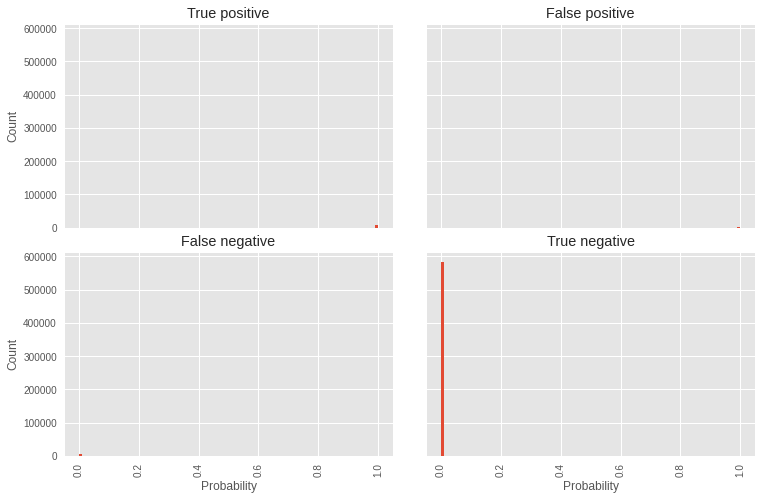

In [52]:
analysis_utilities.detection_evaluation(df, sharey="all", number_of_bins=100)

In [53]:
1 - ((df["p"] < 0.01) | (df["p"] > 0.99)).sum() / len(df.index)

0.0004549999999999832

In [54]:
1 - ((df["p"] < 0.05) | (df["p"] > 0.95)).sum() / len(df.index)

0.00036166666666670455

In [67]:
analysis_utilities.detection_evaluation(df, sharey="row",number_of_bins=100).savefig("hospital_detection_split.pdf", dpi=600)

In [68]:
analysis_utilities.detection_evaluation_without_grouping(df,number_of_bins=100).savefig("hospital_detection_overview.pdf", dpi=600)

In [57]:
(df["p"] >= 0.99).sum() / (df["p"] >= 0.5).sum()

0.9867869127516778

## Analyze confidence vs error probability

In [58]:
r_p_dfs = []

for d in datasets:

    r_p_dfs.append(analysis_utilities.get_correction_confidence_df(d))

r_p_df = pandas.concat(r_p_dfs)

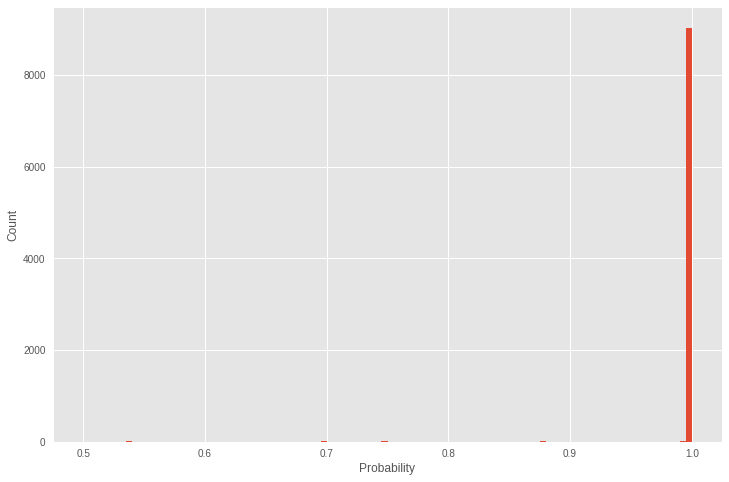

In [59]:
analysis_utilities.correction_confidence_distribution(r_p_df, number_of_bins=100)

In [60]:
(r_p_df["confidence"] >= 0.99).sum() / len(r_p_df.index)

0.9870229007633587

In [61]:
(r_p_df["confidence"] >= 0.95).sum() / len(r_p_df.index)

0.9900763358778626

In [62]:
((r_p_df["confidence"] >= 0.99) & (r_p_df["detection_correct"] == False)).sum() / (r_p_df["detection_correct"] == False).sum()

0.9509345794392523

In [63]:
((r_p_df["confidence"] >= 0.99) & (r_p_df["detection_correct"] == True)).sum() / (r_p_df["detection_correct"] == True).sum()

0.9887897506291466

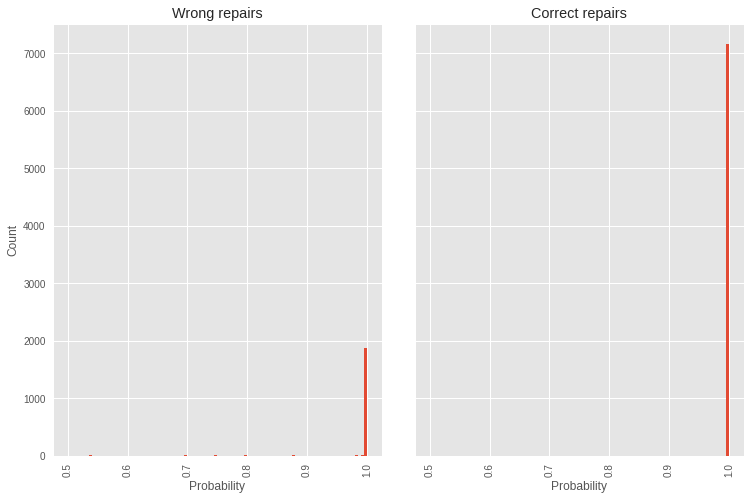

In [64]:
analysis_utilities.correction_confidence_distributions(r_p_df, number_of_bins=100)

In [69]:
analysis_utilities.correction_confidence_distribution(r_p_df, number_of_bins=100).savefig("hospital_correction_overview.pdf")
analysis_utilities.correction_confidence_distributions(r_p_df, number_of_bins=100).savefig("hospital_correction_split.pdf")